In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale

In [2]:
bears = pd.read_csv("bear_attacks_USA.csv")
bears['Decade'] = (bears['Year'] // 10) * 10
bears = bears[bears["Type"] == 'Wild']

month_to_season = {
    'Jan': 'Winter',
    'Feb': 'Winter',
    'Mar': 'Spring',
    'Apr': 'Spring',
    'May': 'Spring',
    'Jun': 'Summer',
    'Jul': 'Summer',
    'Aug': 'Summer',
    'Sep': 'Autumn',
    'Oct': 'Autumn',
    'Nov': 'Autumn',
    'Dec': 'Winter'
}

bears['Season'] = bears['Month'].map(month_to_season)

FileNotFoundError: [Errno 2] No such file or directory: 'bear_attacks_USA.csv'

In [ ]:
bears.head(10)


,Name,Age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude,Decade,Season
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998,1900,Spring
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998,1900,Spring
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998,1900,Spring
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009,1900,Autumn
5,Frank Welch,61.0,male,8/9/1916,Sep,1916,Wild,"Yellowstone National Park, Wyoming",Welch was killed at a camp near Sylvan Pass wh...,Brown bear,0,0,0,1,44.620089,-110.560689,1910,Autumn
6,"Joseph B. ""Frenchy"" Duret",60.0,male,12/6/1922,Jun,1922,Wild,"Absaroka-Beartooth Wilderness, Montana",Duret was attacked and partially devoured by a...,Brown bear,0,1,0,1,45.269612,-109.968024,1920,Summer
7,Olga Gregorchuk,9.0,female,29/08/1929,Aug,1929,Wild,"near Lac Du Bonnet, Manitoba",Gregorchuk was minding her four-year-old broth...,Black bear,0,0,0,1,NaN,NaN,1920,Summer
8,Percy Goodair,52.0,male,12/9/1929,Sep,1929,Wild,"Jasper National Park, Alberta","Goodair, a Parks Canada warden, was killed by ...",Brown bear,0,0,0,1,52.804103,-117.804827,1920,Autumn
9,Jack Thayer,NaN,male,16/10/1929,Oct,1929,Wild,"Admiralty Island, Alaska","Thayer, a U.S. Forest Service employee, and Fr...",Brown bear,0,0,0,1,57.713324,-134.409838,1920,Autumn
12,John Macdonald,70.0,male,1/10/1932,Oct,1932,Wild,"near Dawson, Yukon",Macdonald's mutilated body was initially found...,Brown bear,0,0,0,1,64.042736,-139.410565,1930,Autumn


In [ ]:
bears_attacks = bears.groupby(['Decade', 'Season']).size().reset_index(name='No. of Attacks')

In [ ]:
bears_attacks.head(10)

,Decade,Season,No. of Attacks
0,1900,Autumn,1
1,1900,Spring,3
2,1910,Autumn,1
3,1920,Autumn,2
4,1920,Summer,2
5,1930,Autumn,1
6,1940,Autumn,1
7,1940,Summer,2
8,1950,Autumn,5
9,1950,Summer,1


In [ ]:
bears.shape

(138, 18)

In [ ]:
bears.columns

Index(['Name', ' Age', 'gender', 'Date', 'Month', 'Year', 'Type', 'Location',
       'Description', 'Type of bear', 'Hunter', 'Grizzly', 'Hikers',
       'Only one killed', 'Latitude', 'Longitude', 'Decade', 'Season'],
      dtype='object')

In [ ]:
bears.isnull().sum()

Name                0
 Age                2
gender              0
Date                0
Month               0
Year                0
Type                0
Location            0
Description         0
Type of bear        0
Hunter              0
Grizzly             0
Hikers              0
Only one killed     0
Latitude           45
Longitude          45
Decade              0
Season              0
dtype: int64

In [ ]:
bears['gender'].unique()

array(['female', 'male', 'male\xa0', 'female\xa0'], dtype=object)

In [ ]:
bears.columns = bears.columns.str.strip()
bears.boxplot(column='Age', grid=False, figsize=(10, 6), color = 'Black')
plt.title('Distribution of Bear Attacks by Age of Victim')
plt.suptitle('')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Age')
plt.show()

Text(0, 0.5, 'Age')

In [ ]:
bears['gender'] = bears['gender'].str.capitalize()
bears['gender'] = bears['gender'].str.strip()
gender_attacks = bears['gender'].value_counts()

gender_attacks.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Bear Attacks by Season')
plt.xlabel('Season')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.show()

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

In [ ]:
decade_attacks = bears['Decade'].value_counts().sort_index()

decade_attacks.plot(kind='line', figsize=(10, 6))
plt.title('Number of Bear Attacks by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Attacks')
plt.xlim(1895, 2015)
plt.xticks(range(1900, 2020, 10))
plt.show()

([<matplotlib.axis.XTick at 0x24b601b2550>,
 [Text(1900, 0, ''),
  Text(1910, 0, ''),
  Text(1920, 0, ''),
  Text(1930, 0, ''),
  Text(1940, 0, ''),
  Text(1950, 0, ''),
  Text(1960, 0, ''),
  Text(1970, 0, ''),
  Text(1980, 0, ''),
  Text(1990, 0, ''),
  Text(2000, 0, ''),
  Text(2010, 0, '')])

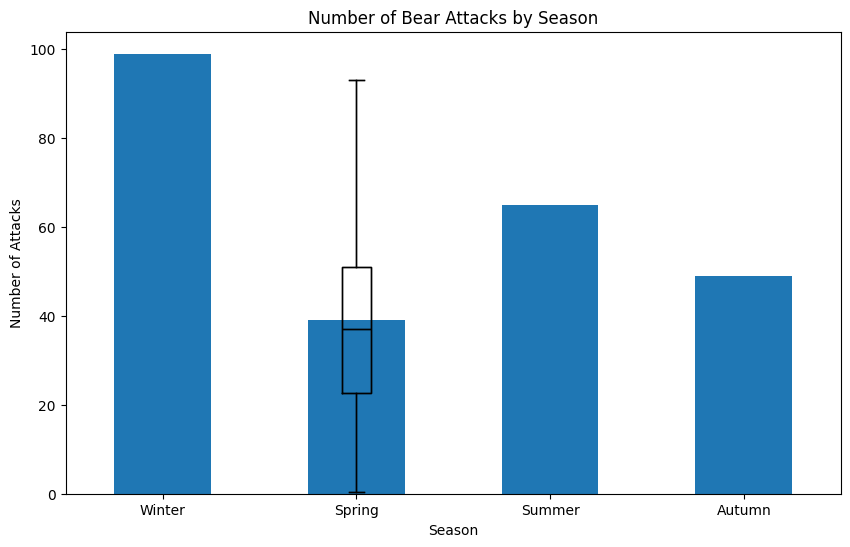

In [ ]:
season_attacks = bears['Season'].value_counts().sort_index()
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_attacks = season_attacks[season_order]

season_attacks.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Bear Attacks by Season')
plt.xlabel('Season')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.show()

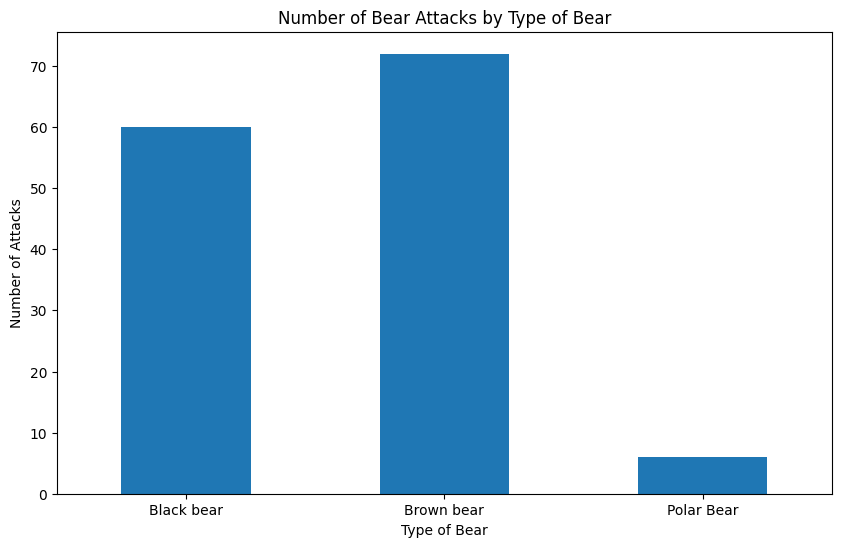

In [ ]:
type_attacks = bears['Type of bear'].value_counts().sort_index()

type_attacks.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Bear Attacks by Type of Bear')
plt.xlabel('Type of Bear')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.show()

c:\Users\conno\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\conno\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\conno\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\conno\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

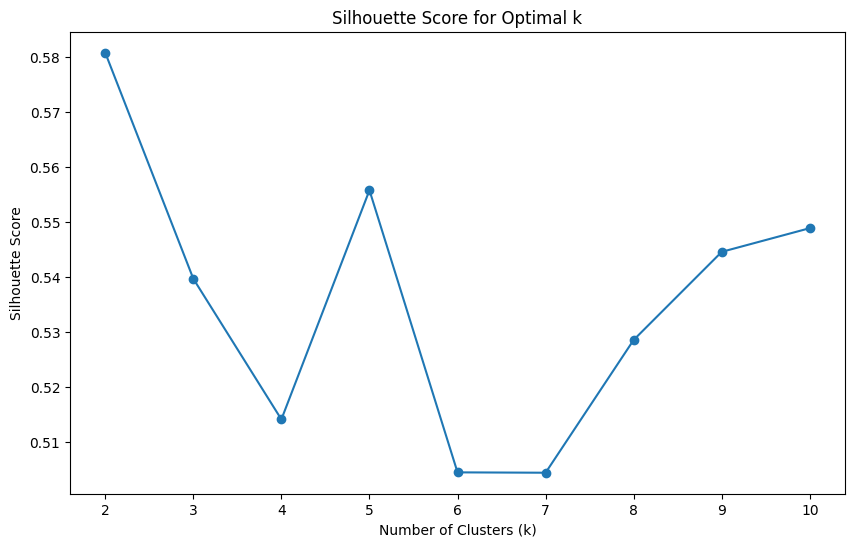

In [ ]:

location_data = bears[['Latitude', 'Longitude']].dropna()  
location_data_scaled = scale(location_data)

silhouette_scores = []
k_values = range(2, 11) 
for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(location_data_scaled)
    silhouette_avg = metrics.silhouette_score(location_data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10,6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

Optimal number of clusters based on silhouette score: 2


c:\Users\conno\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\conno\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


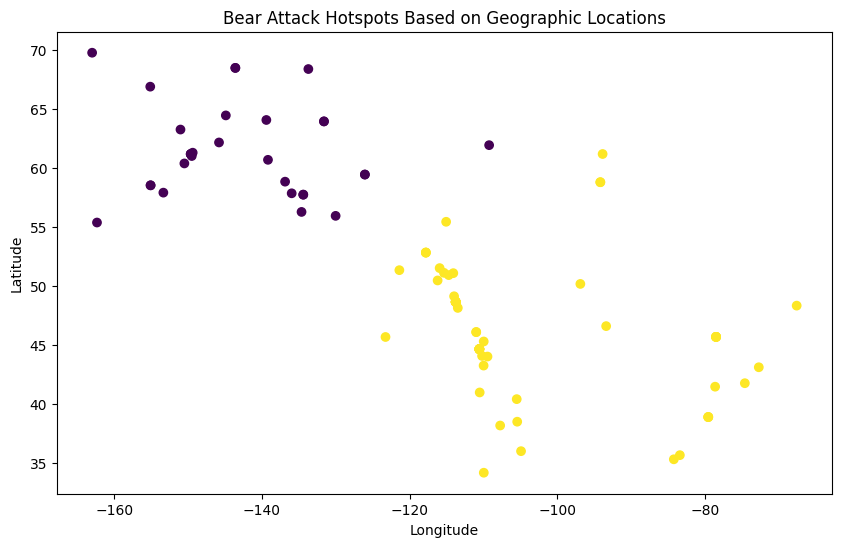

In [ ]:
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters based on silhouette score: {optimal_k}')

bears = bears.dropna(subset=['Latitude', 'Longitude'])

kmeans = cluster.KMeans(n_clusters=optimal_k, random_state=0)
location_data['Cluster'] = kmeans.fit_predict(location_data_scaled)

plt.figure(figsize=(10,6))
plt.scatter(location_data['Longitude'], location_data['Latitude'], c=location_data['Cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bear Attack Hotspots Based on Geographic Locations')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

X = bears_attacks[['Season', 'Decade']].dropna()
y = bears_attacks['No. of Attacks'].dropna()

X = pd.get_dummies(X, columns=['Season'], drop_first=True)

linear_model = LinearRegression()
linear_model.fit(X, y)

y_pred = linear_model.predict(X)

print("Linear Regression Performance:")
print("Mean Absolute Error:", mean_absolute_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Linear Regression Performance:
Mean Absolute Error: 1.9575216681459084
R-squared: 0.6235508659179438
               Coefficient
Decade            0.079180
Season_Spring    -2.333603
Season_Summer     2.039164
Season_Winter    -4.062838


c:\Users\conno\Anaconda\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


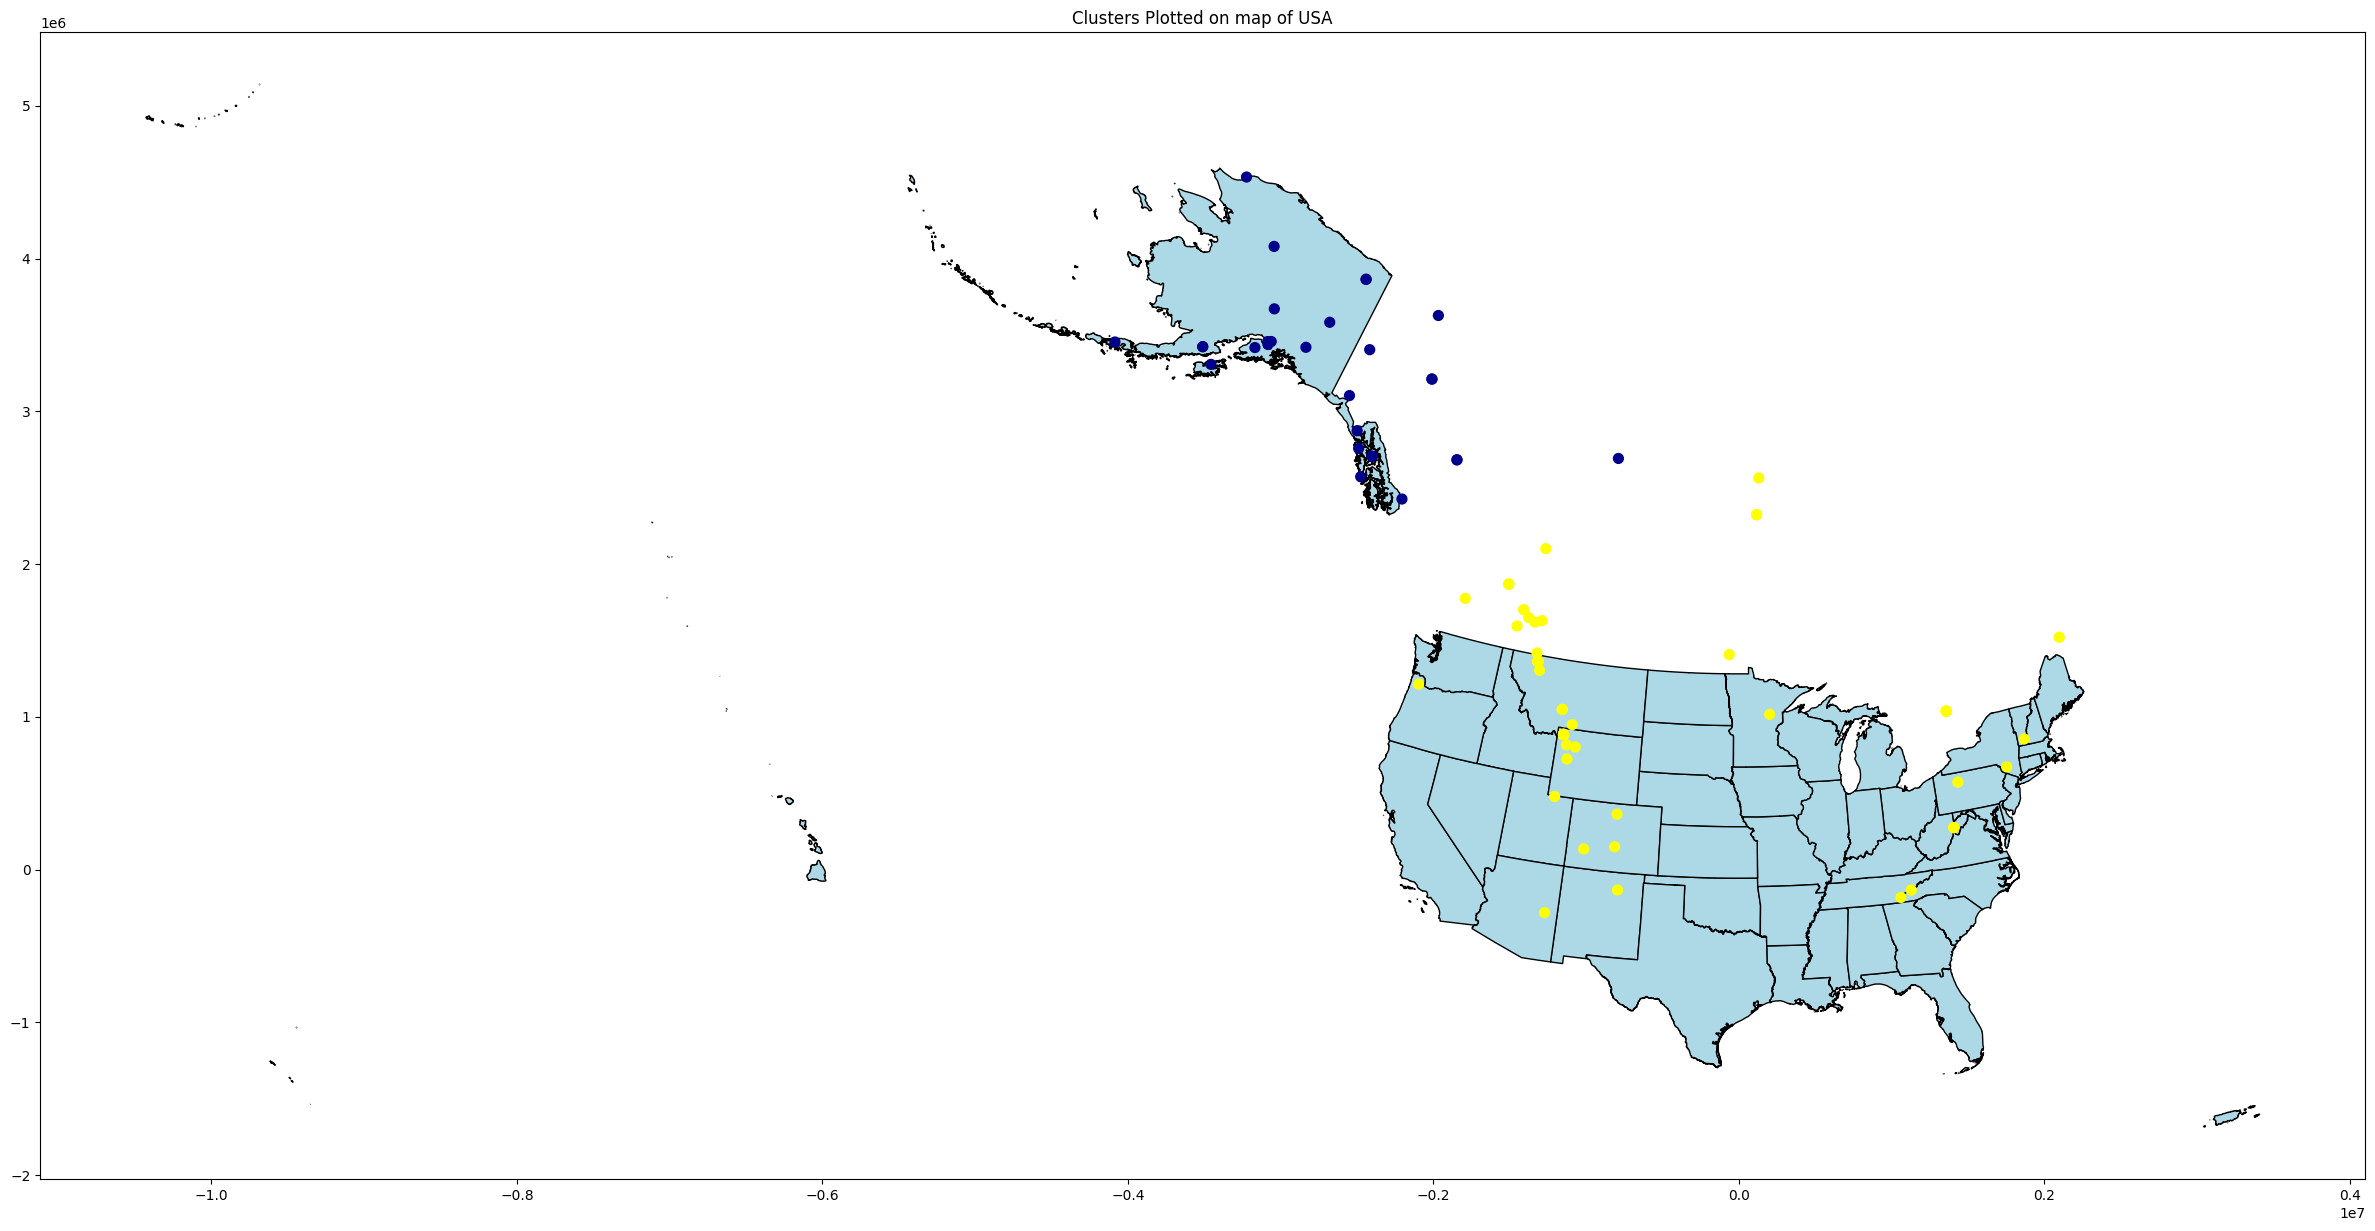

In [ ]:

states = gpd.read_file("cb_2018_us_state_500k") #Read in shape file of USA states
states = states.to_crs("ESRI:102003") #Centres map on main body of USA
ax = states.plot(figsize=(30, 30), color='lightblue', edgecolor='black') #Plotting USA map

colour_map = {0: 'darkblue', 1: 'yellow'} #Setting colours to distinguish between clusters

#Plotting the location data
gdf_points3 = gpd.GeoDataFrame(location_data, geometry=gpd.points_from_xy(location_data['Longitude'], location_data['Latitude']), crs="EPSG:4326")
gdf_points_transformed3 = gdf_points3.to_crs("ESRI:102003") #Transforms the lat and long data to match up with the transformation done to the US map
gdf_points_transformed3['colour'] = gdf_points_transformed3['Cluster'].map(colour_map) #Applying colour map for clusters
gdf_points_transformed3.plot(ax=ax, color=gdf_points_transformed3['colour'], marker='o', markersize=50) #Plotting clusters
plt.title('Clusters Plotted on map of USA')
plt.show()

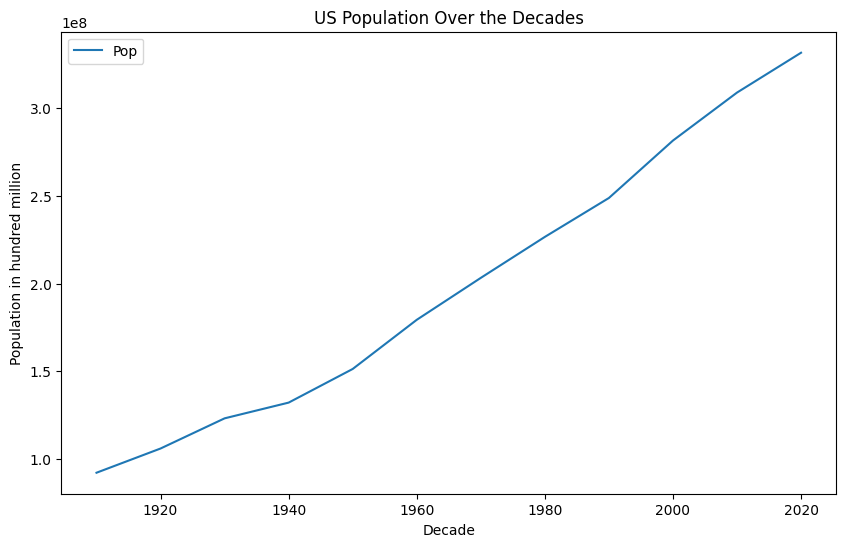

In [ ]:
#US population gathered from official US census, lists are reversed because it was copied over in decending order rather than ascending
US_pop = list(reversed([331449281,	308745538,	281421906,	248709873,	226545805,	203211926,	179323175,	151325798,	132165129,	123202660,	106021568,	92228531]))
US_pop_decade = list(reversed([2020,	2010,	2000, 	1990,	1980,	1970,	1960,	1950,	1940,	1930,	1920,	1910]))

US_pop_data = {
    'Pop': US_pop,
    'Decade': US_pop_decade
}


US_pop_dataframe = pd.DataFrame(US_pop_data)
US_pop_dataframe.plot(x='Decade', y='Pop', kind='line', figsize=(10,6))
plt.xlabel("Decade")
plt.ylabel("Population in hundred million")
plt.title("US Population Over the Decades")
plt.show()

c:\Users\conno\Anaconda\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


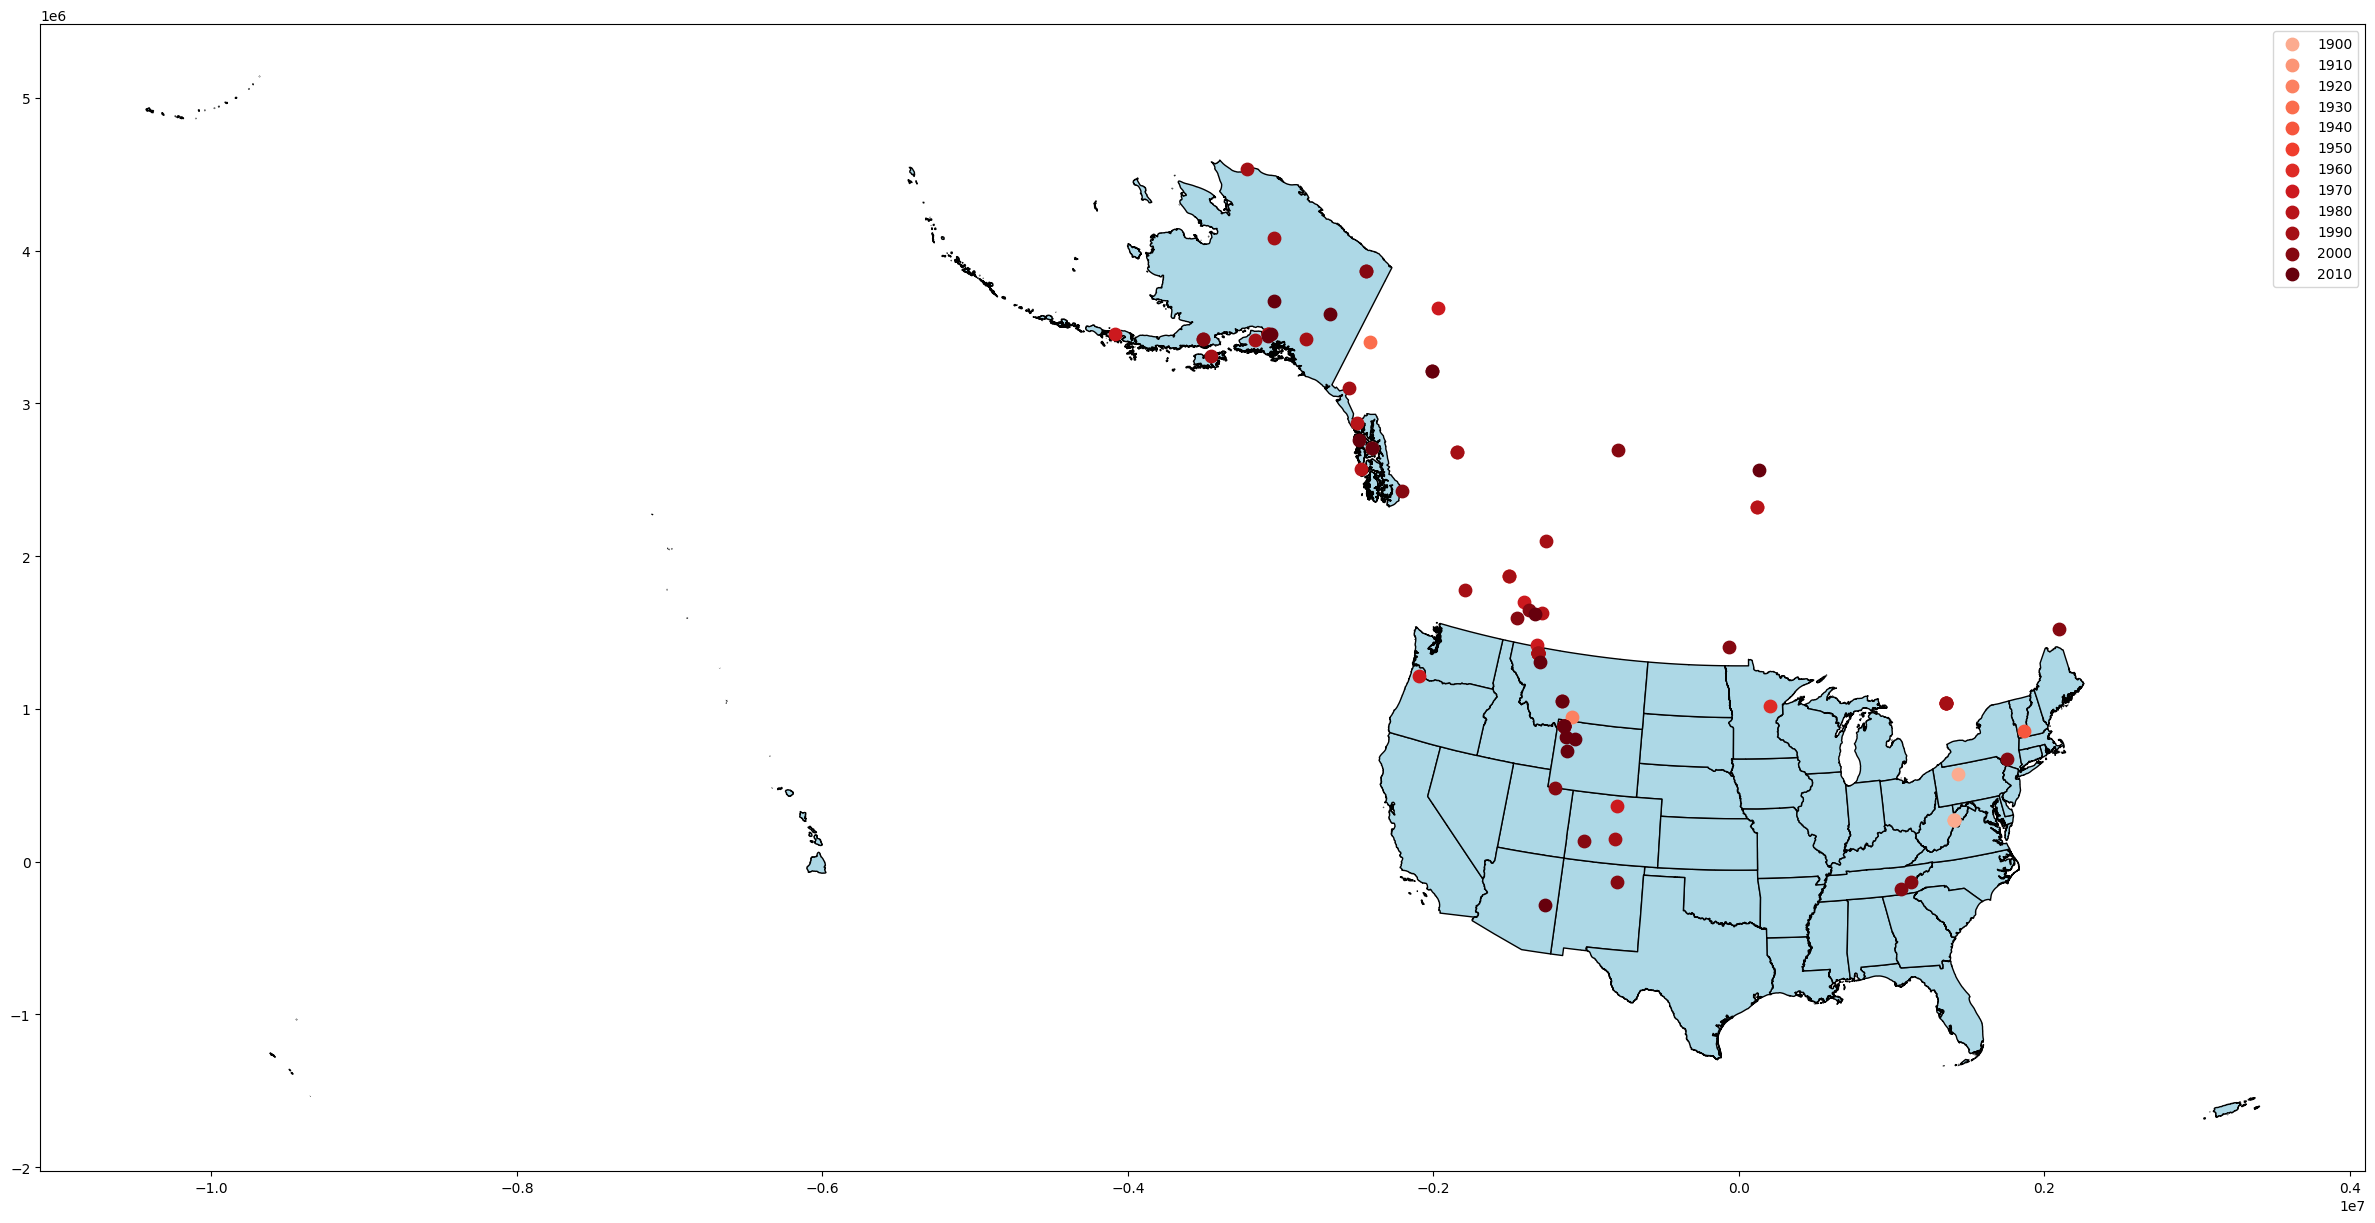

In [ ]:
latitudes_by_decade = bears.groupby('Decade')['Latitude'].agg(list)
longitudes_by_decade = bears.groupby('Decade')['Longitude'].agg(list) #Extracting lat and long variables grouped with their decade

decades = list(latitudes_by_decade.keys()) #Retrieving a list of decades

decade_data_frames = []

for decade in decades:
    decade_attacks_df = {
        'latitude': latitudes_by_decade[decade],
        'longitude': longitudes_by_decade[decade]
    }

    decade_data_frames.append(decade_attacks_df) #Mapping all lat and long variables into a dataframe

colour_gradient = plt.cm.Reds(np.linspace(0.3, 1, 12)) #Getting a gradeint of colours to display points and distinguish decades
colours = colour_gradient.tolist()

states = states.to_crs("ESRI:102003") #Centres map on main body of USA
ax = states.plot(figsize=(30, 30), color='lightblue', edgecolor='black') #Plotting USA map

for i in range(0,len(decade_data_frames)): #Plotting points overlayed onto map of USA
    df4 = pd.DataFrame(decade_data_frames[i])
    gdf_points4 = gpd.GeoDataFrame(decade_data_frames[i], geometry=gpd.points_from_xy(decade_data_frames[i]['longitude'], decade_data_frames[i]['latitude']), crs="EPSG:4326")
    gdf_points_transformed4 = gdf_points4.to_crs("ESRI:102003")
    gdf_points_transformed4.plot(ax=ax, color=colours[i], label=decades[i], marker='o', markersize=80)

plt.legend()
plt.show()

c:\Users\conno\Anaconda\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


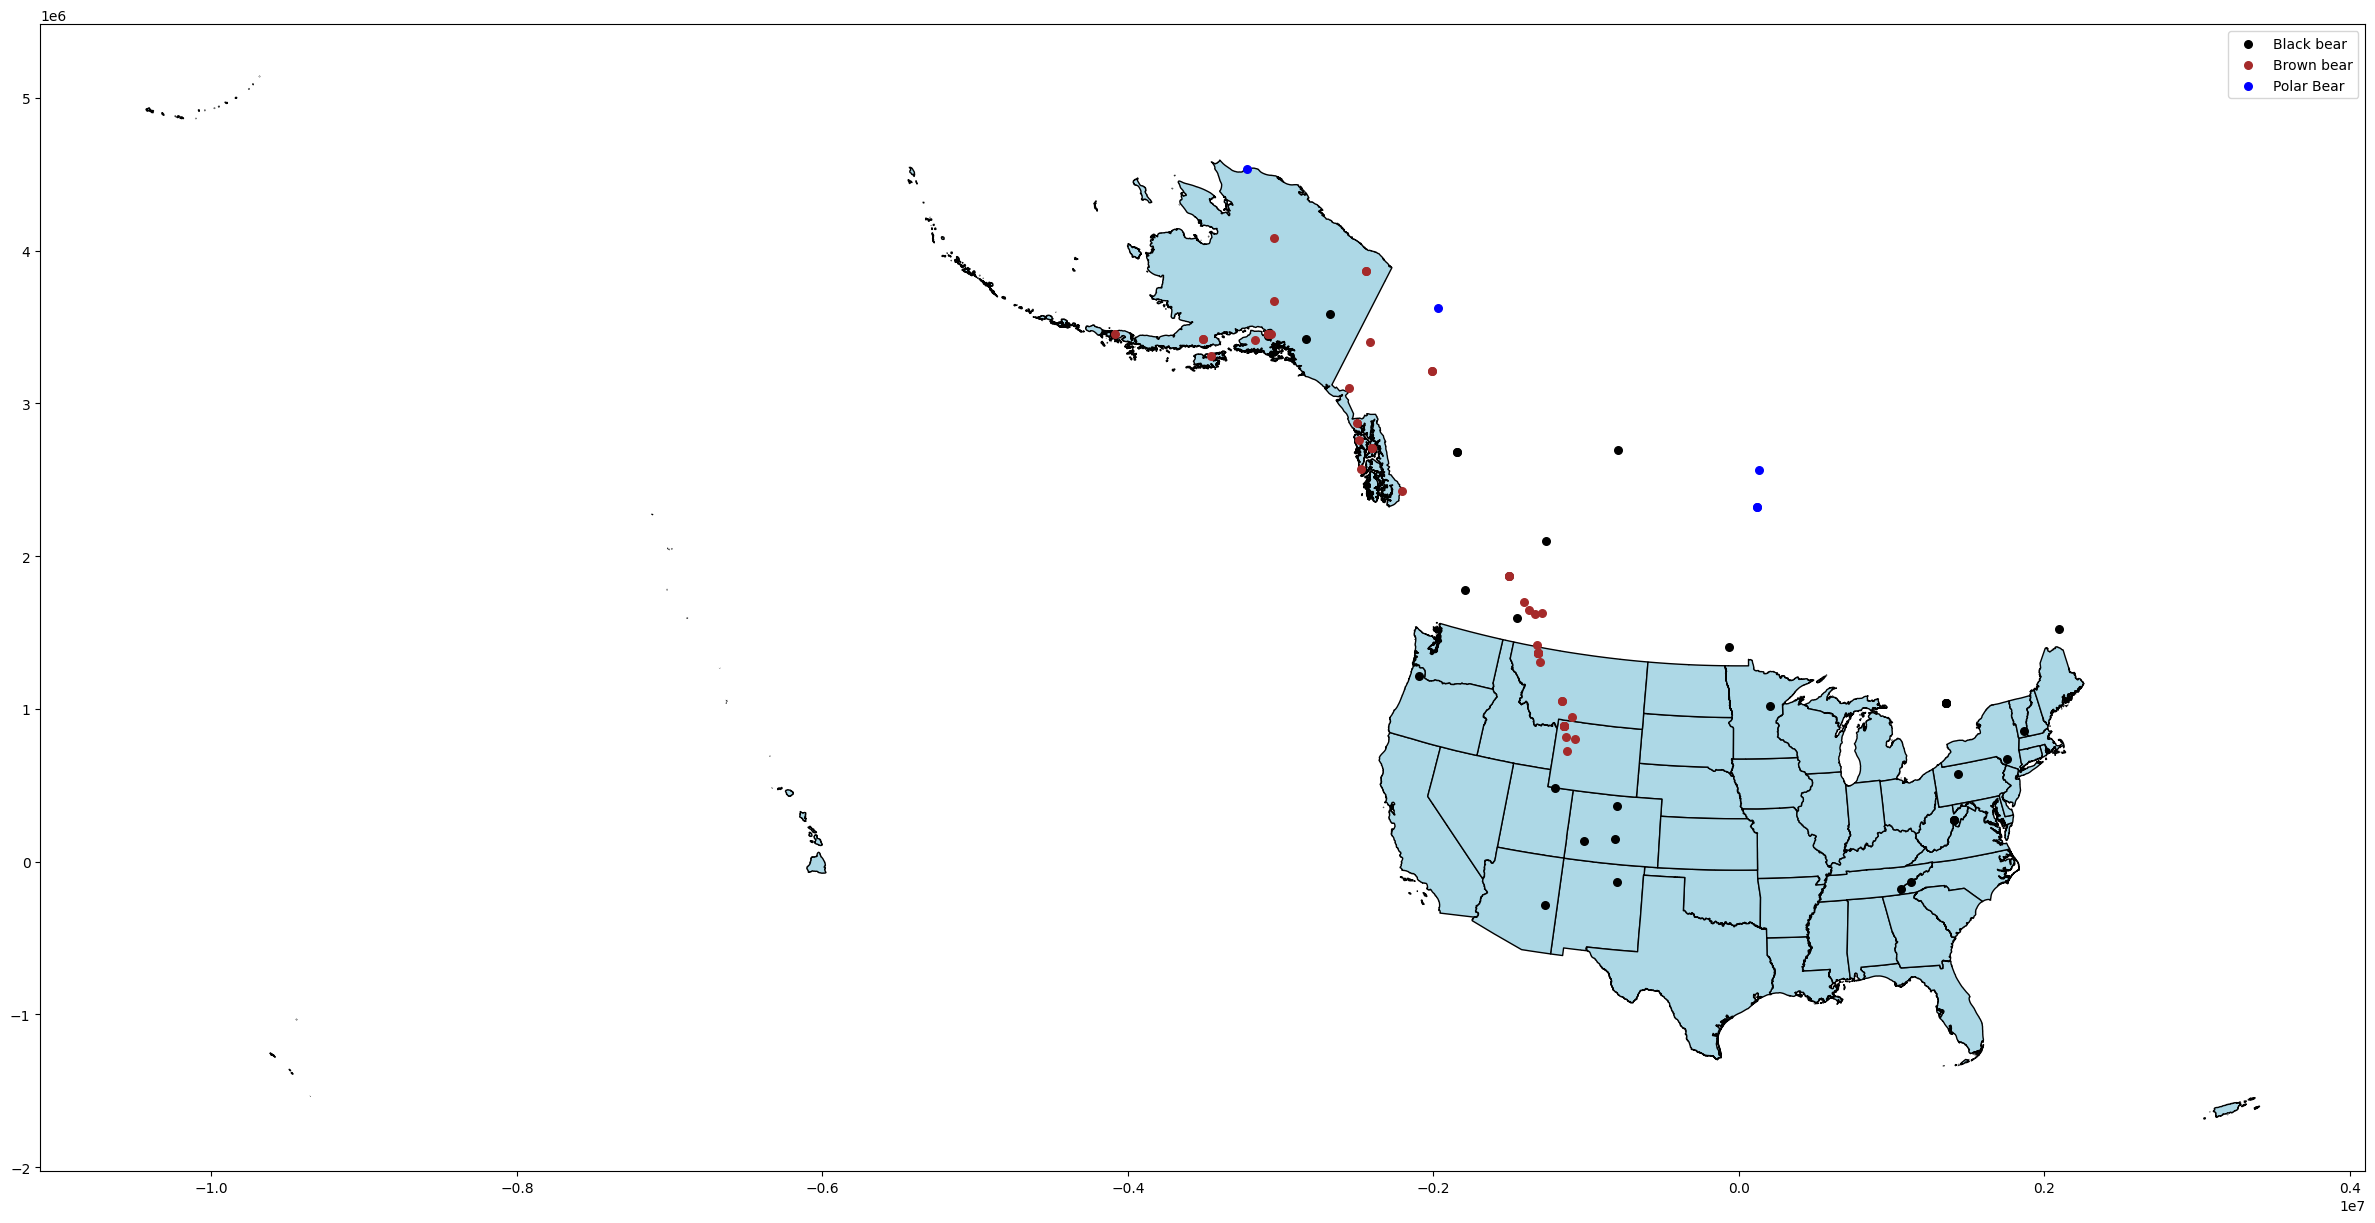

In [ ]:
latitudes_by_bear_type = bears.groupby('Type of bear')['Latitude'].agg(list)
longitudes_by_bear_type = bears.groupby('Type of bear')['Longitude'].agg(list)

bear_types = list(latitudes_by_bear_type.keys())
bear_type_dataframe = []


for bear_type in bear_types:
    bear_type_attack_df = {
        'latitude': latitudes_by_bear_type[bear_type],
        'longitude': longitudes_by_bear_type[bear_type]
    }

    bear_type_dataframe.append(bear_type_attack_df)

colours_by_bear_type = ['black', 'brown', 'blue']
states = states.to_crs("ESRI:102003") #Centres map on main body of USA
ax = states.plot(figsize=(30, 30), color='lightblue', edgecolor='black') #Plotting USA map

for i in range(0,len(bear_type_dataframe)):
    df6 = pd.DataFrame(bear_type_dataframe[i])
    gdf_points6 = gpd.GeoDataFrame(bear_type_dataframe[i], geometry=gpd.points_from_xy(bear_type_dataframe[i]['longitude'], bear_type_dataframe[i]['latitude']), crs="EPSG:4326")
    gdf_points_transformed6 = gdf_points6.to_crs("ESRI:102003")
    gdf_points_transformed6.plot(ax=ax, color=colours_by_bear_type[i], label=bear_types[i], marker='o', markersize=30)

plt.legend()
plt.show()